## CK+ Dataset

The Extended Cohn-Kanade (CK+) dataset contains 593 video sequences from a total of 123 different subjects, ranging from 18 to 50 years of age with a variety of genders and heritage. Each video shows a facial shift from the neutral expression to a targeted peak expression, recorded at 30 frames per second (FPS) with a resolution of either 640x490 or 640x480 pixels. Out of these videos, 327 are labelled with one of seven expression classes: anger, contempt, disgust, fear, happiness, sadness, and surprise. The CK+ database is widely regarded as the most extensively used laboratory-controlled facial expression classification database available, and is used in the majority of facial expression classification methods.

In [1]:
# Define dataset paths
image_data_path = "CK+/extended-cohn-kanade-images/cohn-kanade-images/"
label_path = "CK+/Emotion/"

In [2]:
import os
import pandas as pd

subjects = !ls $image_data_path
data_summary = {'image_seq_path':[], 
               'image_seq_length':[],
               'target':[],
               'first_image':[],
               'last_image':[]}

# Check data for each subject
for subject in subjects:
    emotions = [i for i in os.listdir(os.path.join(image_data_path, subject)) if i not in ['.DS_Store']]
    # Check data for each emotion present
    for emotion in emotions:
        ## get image sequence dir data
        img_seq_path = os.path.join(image_data_path, subject, emotion)
        img_seq_list = [i for i in os.listdir(img_seq_path) if i not in ['.DS_Store']]
        len_img_seq = len(img_seq_list)
        
        ## get target dir data
        target_path = os.path.join(label_path, subject, emotion)
        if os.path.exists(target_path):
            target_list = os.listdir(target_path)
            target = None
            if len(target_list)==1:
                # Load the target class from text file
                with open(os.path.join(label_path, subject, emotion,target_list[0]),'r') as fp:
                    target = fp.read()
                target = float(target.strip())
            elif len(target_list)>1: 
                # Check if there are multiple target files
                print ("Number of text files = ",len(target_list))
            else:
                pass
            
            # Put the path related data into json
            data_summary['image_seq_path'].append(img_seq_path)
            data_summary['image_seq_length'].append(len_img_seq)
            data_summary['target'].append(target)
            data_summary['first_image'].append(min(img_seq_list))
            data_summary['last_image'].append(max(img_seq_list))
            
        else :
            print ("Path {0} does not exist !!".format(target_path))
            
data_summary = pd.DataFrame(data_summary)
data_summary.head()

Path CK+/Emotion/S084\004 does not exist !!
Path CK+/Emotion/S100\001 does not exist !!
Path CK+/Emotion/S126\001 does not exist !!
Path CK+/Emotion/S126\002 does not exist !!
Path CK+/Emotion/S128\001 does not exist !!
Path CK+/Emotion/S128\003 does not exist !!
Path CK+/Emotion/S128\005 does not exist !!
Path CK+/Emotion/S129\001 does not exist !!
Path CK+/Emotion/S129\003 does not exist !!
Path CK+/Emotion/S129\004 does not exist !!
Path CK+/Emotion/S129\005 does not exist !!


,image_seq_path,image_seq_length,target,first_image,last_image
0,CK+/extended-cohn-kanade-images/cohn-kanade-im...,11,3.0,S005_001_00000001.png,S005_001_00000011.png
1,CK+/extended-cohn-kanade-images/cohn-kanade-im...,14,NaN,S010_001_00000001.png,S010_001_00000014.png
2,CK+/extended-cohn-kanade-images/cohn-kanade-im...,14,7.0,S010_002_00000001.png,S010_002_00000014.png
3,CK+/extended-cohn-kanade-images/cohn-kanade-im...,18,NaN,S010_003_00000001.png,S010_003_00000018.png
4,CK+/extended-cohn-kanade-images/cohn-kanade-im...,19,1.0,S010_004_00000001.png,S010_004_00000019.png


In [3]:
data_summary['image_seq_path'].iloc[0]

'CK+/extended-cohn-kanade-images/cohn-kanade-images/S005\\001'

In [4]:
data_summary.shape

(582, 5)

In [5]:
print ("Data with non-null target column:",data_summary[~data_summary['target'].isna()].shape)
print ("Data with null target column:", data_summary[data_summary['target'].isna()].shape)

Data with non-null target column: (327, 5)
Data with null target column: (255, 5)


In [6]:
data_summary = data_summary[~data_summary['target'].isna()].reset_index(drop=True)

There are some images where "target" column is null.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

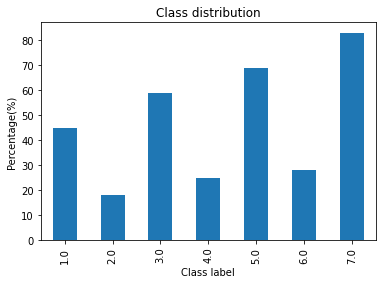

In [8]:
# Plot the distribution of target classes
data_summary[~data_summary['target'].isna()]['target'].value_counts().sort_index().plot(kind='bar')
plt.title("Class distribution")
plt.ylabel("Percentage(%)")
plt.xlabel("Class label")
plt.show()

The CK+ dataset has a total of 327 sequences of images and the number of each facial expression in the dataset varies a little presenting a distribution of:

    45 sequences of anger, 
    18 of contempt, 
    59 of disgust, 
    25 of fear, 
    69 of happiness, 
    28 of sadness and 
    83 of surprise. 
   
Labels= 1:anger, 2:contempt, 3:disgust, 4:fear, 5:happiness, 6:sadness, 7:surprise.

In [9]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

Target: 5.0


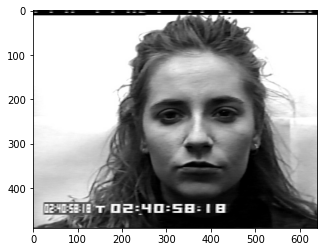

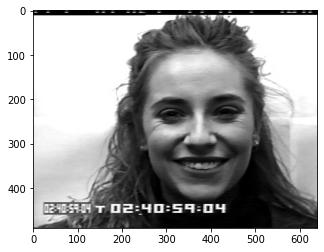

In [10]:
rand_index = random.randint(0,300)
img1 = cv2.imread(os.path.join(data_summary["image_seq_path"].iloc[rand_index], data_summary["first_image"].iloc[rand_index]))
img2 = cv2.imread(os.path.join(data_summary["image_seq_path"].iloc[rand_index], data_summary["last_image"].iloc[rand_index]))
print ("Target:",data_summary["target"].iloc[rand_index])
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [11]:
img1.shape, img2.shape

((490, 640, 3), (490, 640, 3))

In [13]:
# Save the data summary file
data_summary.to_csv("data_summary.csv",index=False)

In [15]:
## Use dlib to extract faces.

In [134]:
#####################################################################
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

hog_face_detector = dlib.get_frontal_face_detector()

def hogDetectFaces(image,
                   hog_face_detector, 
                   display=True):
    height, width, _ = image.shape
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    start = time()
    results = hog_face_detector(imgRGB, 1)
    end = time()
    
    ## if multiple faces, only last detected face is considered
    for bbox in results:
        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()
    output_image = image[y1:y2,x1:x2,::-1].copy()
    
    if display:
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');
    else:
        return output_image, [x1, x2, y1, y2]
    

## detect faces for all the images(neutral + peak)
for i, row in data_summary.iterrows():
    
    if (i+1)%10 == 0 :
        print ("Processing sample no.",i+1)
    
    ## load peak image first
    file_path = os.path.join(row["image_seq_path"], row["last_image"])
    img = cv2.imread(file_path)
    ## apply face-detection function
    output, bbox = hogDetectFaces(img, hog_face_detector, display=False)
    ## save the result for the peak image
    cv2.imwrite(os.path.join("cropped_and_denoised", row["last_image"]), output)
    
    ## use the bbox coordinates from above to crop the face from the neutral image
    file_path = os.path.join(row["image_seq_path"], row["first_image"])
    img = cv2.imread(file_path)
    x1, x2, y1, y2 = bbox
    output = img[y1:y2,x1:x2,::-1].copy()
    ## save the result for the first image
    cv2.imwrite(os.path.join("cropped_and_denoised", row["first_image"]), output)

Processing sample no. 10
Processing sample no. 20
Processing sample no. 30
Processing sample no. 40
Processing sample no. 50
Processing sample no. 60
Processing sample no. 70
Processing sample no. 80
Processing sample no. 90
Processing sample no. 100
Processing sample no. 110
Processing sample no. 120
Processing sample no. 130
Processing sample no. 140
Processing sample no. 150
Processing sample no. 160
Processing sample no. 170
Processing sample no. 180
Processing sample no. 190
Processing sample no. 200
Processing sample no. 210
Processing sample no. 220
Processing sample no. 230
Processing sample no. 240
Processing sample no. 250
Processing sample no. 260
Processing sample no. 270
Processing sample no. 280
Processing sample no. 290
Processing sample no. 300
Processing sample no. 310
Processing sample no. 320


cropped_and_denoised\S084_001_00000001.png


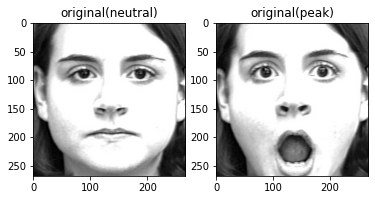

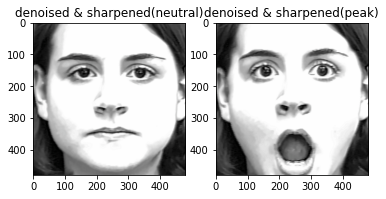

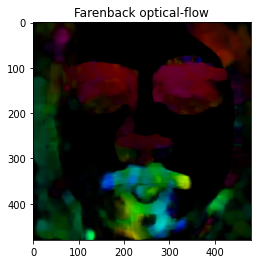

In [13]:
# generate farenback optical flow for the images
# Note: load data_summary before running this function
def return_farenback_of(img1, img2, output_path="", save=True, display=False):
    
    if display :
        plt.subplot(121);plt.imshow(img1);plt.title("original(neutral)")
        plt.subplot(122);plt.imshow(img2);plt.title("original(peak)")
        plt.show()
        
    img1 = cv2.resize(img1, (480, 480))
    img2 = cv2.resize(img2, (480, 480))
    
    ## denoise the image
    img1 = cv2.fastNlMeansDenoisingColored(img1)
    img2 = cv2.fastNlMeansDenoisingColored(img2)
    
    ## sharpen the image
    kernel3 = np.array([[0, -1,  0],
                       [-1,  5, -1],
                        [0, -1,  0]])
    img1 = cv2.filter2D(src=img1, ddepth=-1, kernel=kernel3)
    img2 = cv2.filter2D(src=img2, ddepth=-1, kernel=kernel3)
    
    if display :
        plt.subplot(121);plt.imshow(img1);plt.title("denoised & sharpened(neutral)")
        plt.subplot(122);plt.imshow(img2);plt.title("denoised & sharpened(peak)")
        plt.show()

    # Create mask
    hsv_mask = np.zeros_like(img1)
    
    # Make image saturation to a maximum value
    hsv_mask[..., 1] = 255

    # Convert 
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute magnite and angle of 2D vector
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Set image hue value according to the angle of optical flow
    hsv_mask[..., 0] = ang * 180 / np.pi / 2
    # Set value as per the normalized magnitude of optical flow
    hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert to rgb
    bgr_representation = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    
    if save:
        cv2.imwrite(output_path, bgr_representation)
    if display:
        plt.imshow(bgr_representation)
        plt.title("Farenback optical-flow")
        plt.show()
    return

index = 155
print (os.path.join("cropped_and_denoised",data_summary["first_image"].loc[index]))
img1 = cv2.imread(os.path.join("cropped_and_denoised",data_summary["first_image"].loc[index]))
img2 = cv2.imread(os.path.join("cropped_and_denoised",data_summary["last_image"].loc[index]))
output_path = "farenback_of" + "/" + "_".join(data_summary["first_image"].loc[index].split("_")[:2]) + ".png"
return_farenback_of(img1, img2, output_path, save=False, display=True)

# data_summary[data_summary["first_image"].str[:8]=="S084_001"]

In [90]:
for index, row in data_summary.iterrows():
    if (index+1)%10 == 0 :
        print ("Processing sample no.",index+1)
    img1 = cv2.imread(os.path.join("cropped_and_denoised",row["first_image"]))
    img2 = cv2.imread(os.path.join("cropped_and_denoised",row["last_image"]))
    output_path = "farenback_of" + "/" + "_".join(row["first_image"].split("_")[:2]) + ".png"
    return_farenback_of(img1, img2, output_path=output_path, save=True, display=False)
    del img1, img2, output_path

Processing sample no. 10
Processing sample no. 20
Processing sample no. 30
Processing sample no. 40
Processing sample no. 50
Processing sample no. 60
Processing sample no. 70
Processing sample no. 80
Processing sample no. 90
Processing sample no. 100
Processing sample no. 110
Processing sample no. 120
Processing sample no. 130
Processing sample no. 140
Processing sample no. 150
Processing sample no. 160
Processing sample no. 170
Processing sample no. 180
Processing sample no. 190
Processing sample no. 200
Processing sample no. 210
Processing sample no. 220
Processing sample no. 230
Processing sample no. 240
Processing sample no. 250
Processing sample no. 260
Processing sample no. 270
Processing sample no. 280
Processing sample no. 290
Processing sample no. 300
Processing sample no. 310
Processing sample no. 320


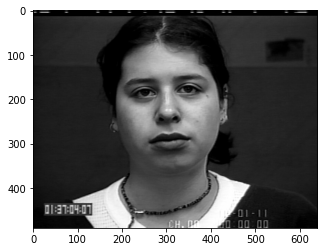

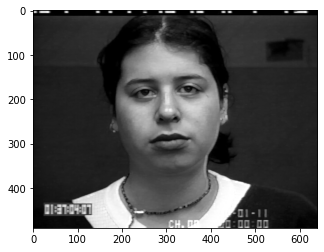

In [146]:
kernel = np.ones((3,3),np.uint8)
plt.imshow(img1)
plt.show()
plt.imshow(cv2.dilate(img1,kernel,iterations = 1))
plt.show()

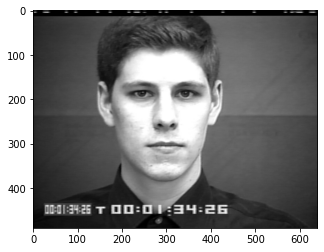

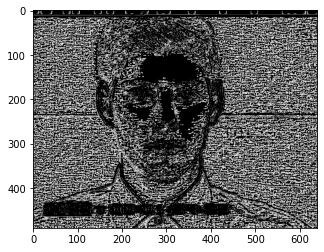

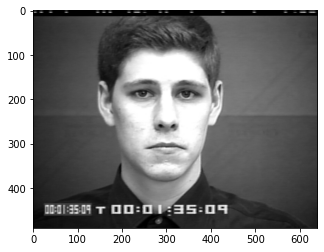

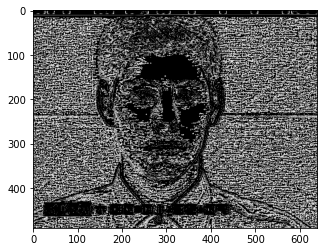

In [134]:
## Check the Laplacian filter for edges (second order image gradients)
img1 = cv2.GaussianBlur(img1, (5,5), 0.5)
plt.imshow(img1)
plt.show()

laplacian = cv2.Laplacian(img1, -1, ksize=5)
plt.imshow(laplacian.astype('uint8') * 255)
plt.show()

img2 = cv2.GaussianBlur(img2, (5,5), 0.5)
plt.imshow(img2)
plt.show()

laplacian = cv2.Laplacian(img2,-1, ksize=5)
plt.imshow(laplacian.astype('uint8') * 255)
plt.show()

224


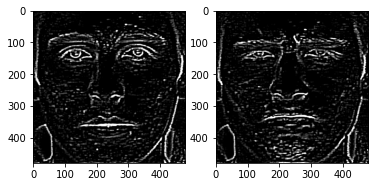

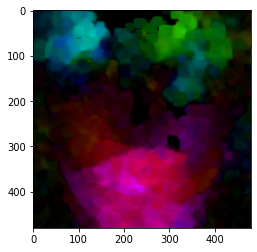

In [78]:
import numpy as np

## folder1. "laplacian_farenback_of": Laplacian(5x5 filter) + farenback-of
## folder2. "lap_of_gau_farenback_of": Laplacian(Gausiaan(5x5), (3,3)) + farenback-of
## folder3. "laplacian": Laplacian(5x5)

def return_faren_of_lap(index):
    img1 = cv2.imread(os.path.join("cropped_and_denoised",data_summary["first_image"].iloc[index]))
    img2 = cv2.imread(os.path.join("cropped_and_denoised",data_summary["last_image"].iloc[index]))

#     plt.subplot(1,2,1)
#     plt.imshow(img1)
#     plt.subplot(1,2,2)
#     plt.imshow(img2)
#     plt.show()
    
    img1 = cv2.resize(img1, (480, 480))
    img2 = cv2.resize(img2, (480, 480))
    
    ## Gaussian
    img1 = cv2.GaussianBlur(img1, (5,5),1)
    img2 = cv2.GaussianBlur(img2, (5,5),1)
    
    ## Laplacian
    lap1 = cv2.Laplacian(img1,-1,ksize=5)
    lap2 = cv2.Laplacian(img2,-1,ksize=5)
    
    img1 = lap1#.astype('uint8') * 255
    img2 = lap2#.astype('uint8') * 255
    
    ## denoise the image
    shift=3
    kernel = np.ones((shift, shift), np.uint8)
    img1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
    img2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
    
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.show()
    
    # Create mask
    hsv_mask = np.zeros_like(img1)
    
    # Make image saturation to a maximum value
    hsv_mask[..., 1] = 255

    # Convert 
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute magnite and angle of 2D vector
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Set image hue value according to the angle of optical flow
    hsv_mask[..., 0] = ang * 180 / np.pi / 2
    # Set value as per the normalized magnitude of optical flow
    hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert to rgb
    rgb_representation = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
#     cv2.imwrite("laplacian" + "/" + "_".join(data_summary["first_image"].iloc[index].split("_")[:2]) + ".png", lap2)
#     print("_".join(data_summary["first_image"].iloc[index].split("_")[:2]))
#     plt.subplot(1,2,1)
    plt.imshow(rgb_representation)
    
#     img = cv2.imread("farenback_of" + "/" + "_".join(data_summary["first_image"].iloc[index].split("_")[:2]) + ".png")
#     plt.subplot(1,2,2)
#     plt.imshow(img)
    plt.show()
    return

# for i, row in data_summary.iterrows():
#     if (i+1)%10 == 0 :
#         print ("Processing",i+1,"th sample")

i=random.randint(0,326)
print(i)
return_faren_of_lap(i)

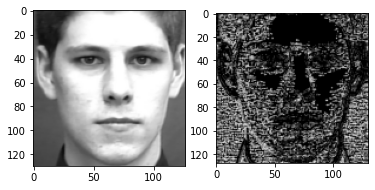

In [14]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("../final_thesis/temp_original_cropped.png")
img2 = cv2.imread("../final_thesis/temp_laplacian_cropped.png")

plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [11]:
img1.shape

(187, 375, 3)